In [67]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
from dataset_encoding import alt_encodings

#### **Loading Data...**
##### Electric vehicles

In [68]:
filepath = {
    'FEV_data' : '../Datasets/cars/FEV data.csv',
    'electric_vehicle_population': '../Datasets/cars/Electric Vehicle Population Data.csv', 
    'electric_car': '../Datasets/cars/Electric Car.csv',
    'cars' : '../Datasets/cars/cars.csv',
    'cars_1' : '../Datasets/cars/Cars 1.csv'
    }

h2_prod = '../Datasets/H2_O2_production'

filepath_encodings = [alt_encodings(filepath[key])[1] for key in filepath.keys()]
filepath_encodings

['windows-1252', 'CP949', 'CP949', 'CP949', 'CP949']

In [69]:
fev_data_df = pd.read_csv(filepath['FEV_data'], encoding=filepath_encodings[0], header=0, sep=',')
fev_data_df.head(3)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55


In [70]:
electric_car_df = pd.read_csv(filepath['electric_car'], encoding=filepath_encodings[2], sep=',', header=0)
electric_car_df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


#### **Data Collect and validation**
##### Type of data

In [71]:
fev_data_df.dtypes

Car full name                              object
Make                                       object
Model                                      object
Minimal price (gross) [PLN]                 int64
Engine power [KM]                           int64
Maximum torque [Nm]                         int64
Type of brakes                             object
Drive type                                 object
Battery capacity [kWh]                    float64
Range (WLTP) [km]                           int64
Wheelbase [cm]                            float64
Length [cm]                               float64
Width [cm]                                float64
Height [cm]                               float64
Minimal empty weight [kg]                   int64
Permissable gross weight [kg]             float64
Maximum load capacity [kg]                float64
Number of seats                             int64
Number of doors                             int64
Tire size [in]                              int64


In [72]:
(
    fev_data_df
        .dtypes
        .value_counts()
)

int64      10
float64    10
object      5
dtype: int64

In [73]:
electric_car_df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [74]:
(
    electric_car_df
        .dtypes
        .value_counts()
)

object     8
int64      5
float64    1
dtype: int64

#### **How many variables exist in our datasets**

In [75]:
(
    fev_data_df
        .shape
)

(53, 25)

In [76]:
(
    electric_car_df
        .shape
)

(103, 14)

#### **Explicit null values in our datasets**

In [77]:
(
    fev_data_df
        .isnull()
        .sum()
)

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

In [78]:
(
    fev_data_df
        .isnull()
        .sum()
        .sum()
)

30

In [79]:
(
    electric_car_df
        .isnull()
        .sum()
)

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

#### **How is the proportion of null values per variable**

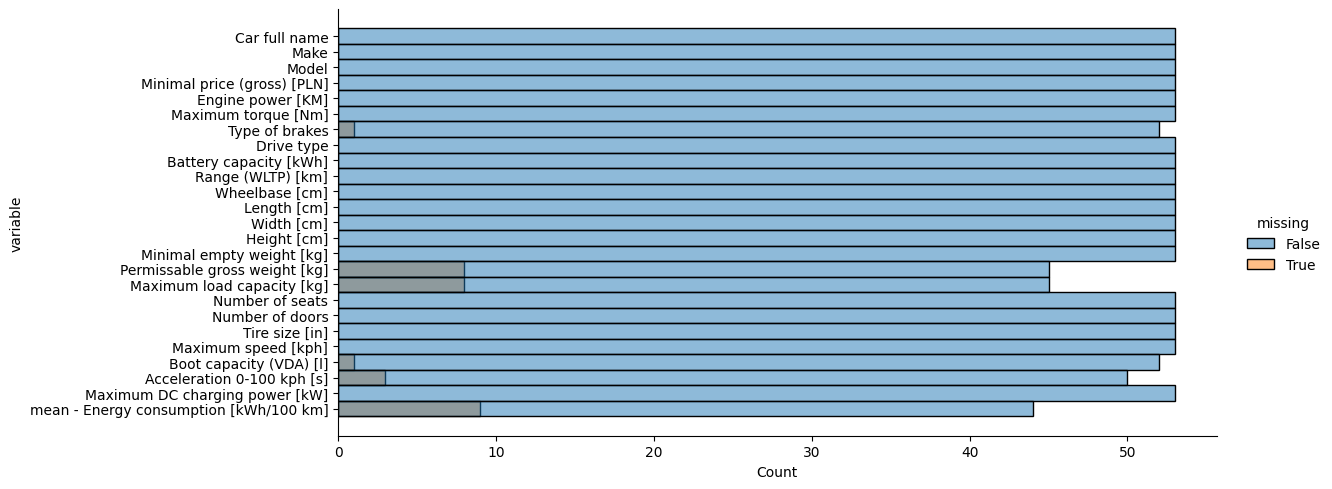

In [80]:
(
    fev_data_df
        .isnull()
        .melt(value_name='missing')
        .pipe(
            lambda df: (
                sns.displot(
                    data=df,
                    y='variable',
                    hue='missing',
                    aspect=2.5
                )
            )
        )
)
plt.show()

#### **How can we visualize null values in the whole dataset?**

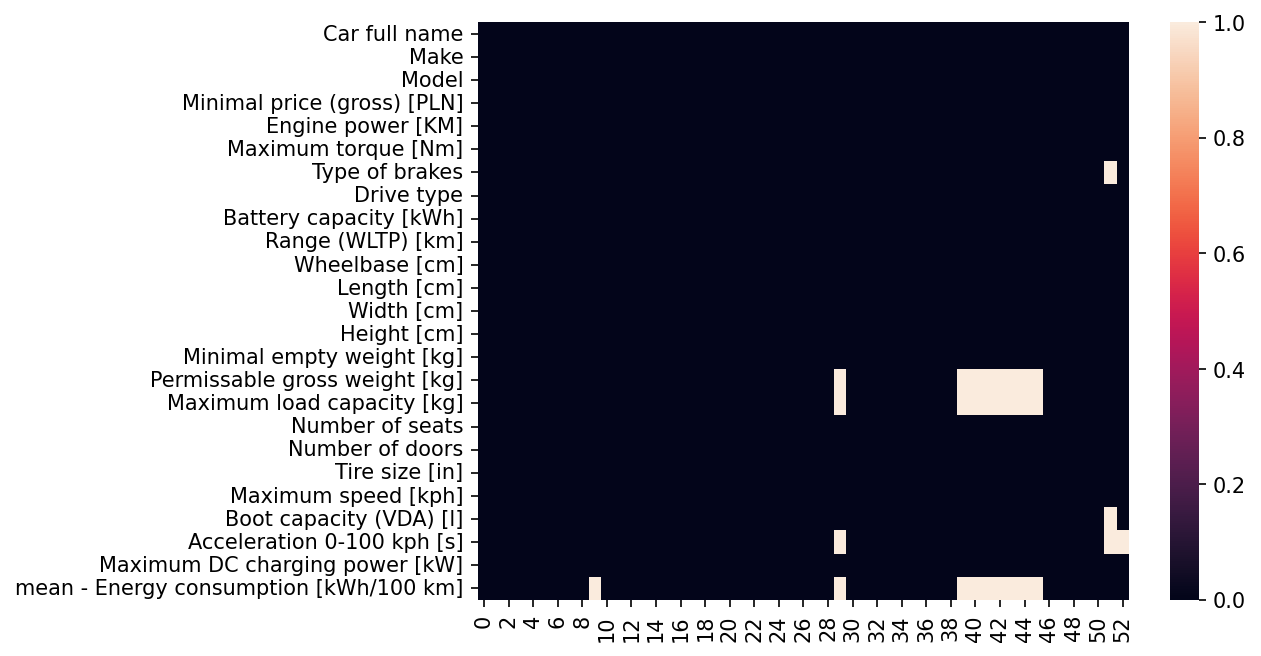

In [81]:
plt.figure(figsize=(7,5), dpi=150)
(
    fev_data_df
        .isnull()
        .T
        .pipe(
            lambda df: (
                sns.heatmap(
                    data=df
                )
            )
        )
)
plt.show()

#### **How many observations can we lost if we discard missing values?**

In [82]:
processed_fev_data = (
    fev_data_df
        .dropna()
)

processed_fev_data.head(15)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.20
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.10
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.30
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,159900,136,260,disc (front + rear),2WD (front),50.0,320,...,1975.0,450.0,5,5,17,150,350.0,8.7,100,15.60


#### **Counts and proportions**
#### **Prelude: Which statistical describe our dataset?**
##### Just numerical values 

In [83]:
processed_fev_data.describe(include={np.number})

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,235065.785714,237.666667,425.166667,58.842857,351.738095,269.823810,433.509524,184.754762,154.980952,1821.214286,2267.809524,510.452381,4.761905,4.809524,17.547619,169.500000,404.333333,7.892857,109.666667,18.610714
std,154079.039546,149.006084,233.915965,23.287484,96.788192,22.785627,49.268883,14.835574,9.454519,469.155626,543.690651,132.997745,0.790478,0.505487,1.837315,35.674853,146.550693,2.570697,61.602054,4.134293
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,130.000000,171.000000,2.800000,22.000000,13.100000
25%,140650.000000,136.000000,260.000000,39.200000,279.250000,256.325000,406.625000,178.725000,151.200000,1516.250000,1881.500000,440.000000,4.250000,5.000000,16.000000,146.250000,310.250000,6.800000,62.500000,15.600000
50%,166945.000000,184.000000,317.500000,52.000000,352.500000,270.000000,431.800000,180.250000,156.000000,1621.500000,2099.500000,485.500000,5.000000,5.000000,17.000000,160.000000,371.000000,7.900000,100.000000,16.875000
75%,316875.000000,313.000000,540.000000,78.650000,434.750000,290.000000,475.500000,193.500000,160.500000,2248.750000,2855.000000,565.000000,5.000000,5.000000,19.000000,187.500000,497.000000,9.650000,143.750000,22.937500
max,794000.000000,625.000000,1050.000000,95.000000,549.000000,327.500000,496.300000,255.800000,190.000000,2695.000000,3130.000000,1056.000000,8.000000,5.000000,21.000000,260.000000,660.000000,13.100000,270.000000,27.550000


In [84]:
electric_car_df.describe(include={np.number})

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


#### Just categorical values

In [85]:
processed_fev_data.describe(include='object')

,Car full name,Make,Model,Type of brakes,Drive type
count,42,42,42,42,42
unique,42,19,42,2,3
top,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,disc (front + rear),2WD (front)
freq,1,6,1,35,20


In [86]:
electric_car_df.describe(include='object')

,Brand,Model,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
count,103,103,103,103,103,103,103,103
unique,33,102,51,2,3,4,9,8
top,Tesla,e-Soul 64 kWh,230,Yes,AWD,Type 2 CCS,SUV,C
freq,13,2,6,98,41,90,45,30


#### **How counts can be visualized?**
##### Pandas

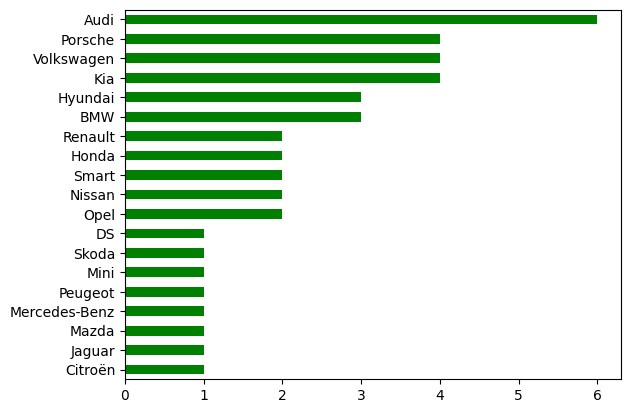

In [87]:
(
    processed_fev_data
        .Make
        .value_counts()
        .sort_values(ascending=True)
        .plot(
            kind='barh',
            color='green'
        )
)
plt.show()

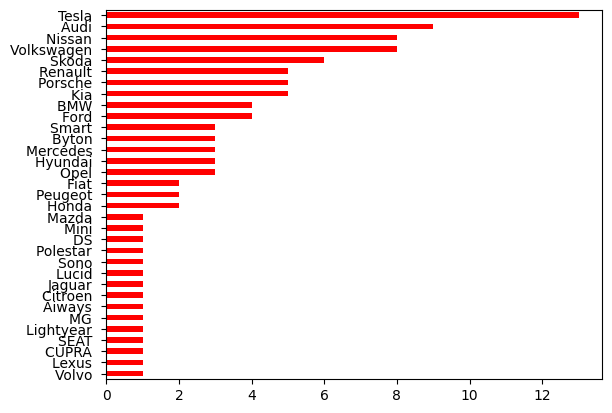

In [88]:
(
    electric_car_df
        .Brand
        .value_counts()
        .sort_values(ascending=True)
        .plot(
            kind='barh',
            color='red'
        )
)
plt.show()

In [89]:
(
    electric_car_df
        .groupby('Brand')
        .count()
        .sort_values('Model', ascending=False)
        .iloc[:5, :1]
)

,Model
Brand,
Tesla,13
Audi,9
Nissan,8
Volkswagen,8
Skoda,6


##### Seaborn

In [90]:
order_fev = processed_fev_data['Make'].value_counts().head(5).index
order_fev

Index(['Audi', 'Porsche', 'Volkswagen', 'Kia', 'Hyundai'], dtype='object')

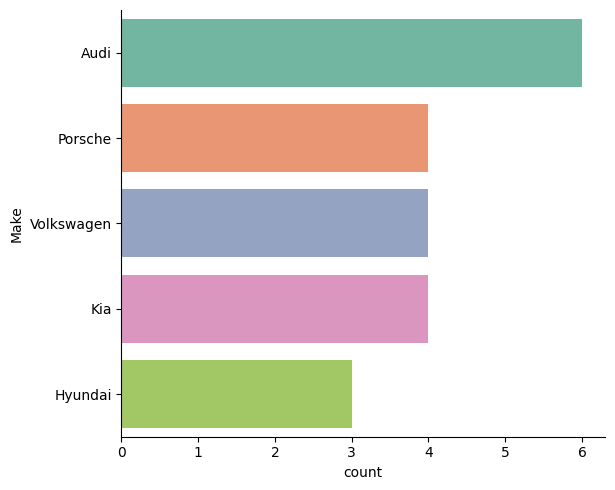

In [91]:
sns.catplot(
    data=processed_fev_data,
    y='Make',
    kind='count',
    aspect=1.25,
    palette='Set2',
    order=order_fev
    )
plt.tight_layout()
plt.show()

In [92]:
order_brand = electric_car_df.Brand.value_counts().head(5).index

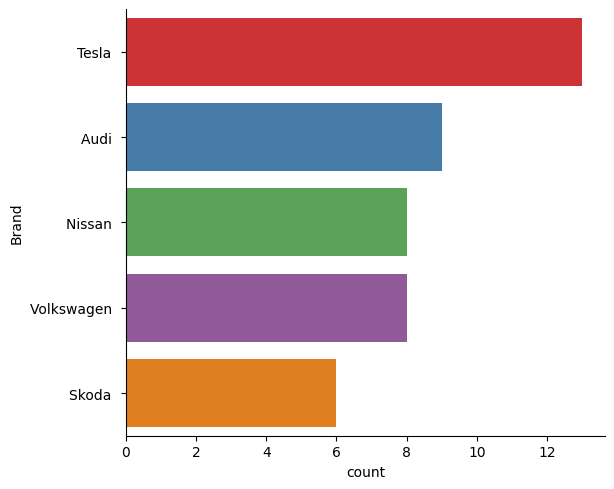

In [93]:
sns.catplot(
    data=electric_car_df,
    y='Brand',
    kind='count',
    palette='Set1',
    aspect=1.25,
    order=order_brand
)
plt.show()

In [94]:
fast_charge_brands = electric_car_df.groupby('RapidCharge')['Brand'].value_counts()

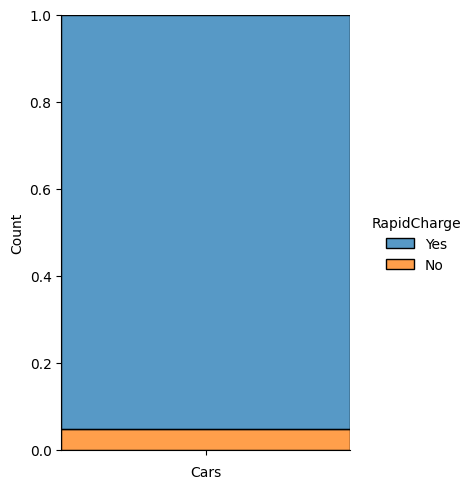

In [95]:
(
    electric_car_df
        .add_column('Cars', '')
        .pipe(
            lambda df:(
                sns.displot(
                    data=df,
                    x='Cars',
                    hue='RapidCharge',
                    multiple='fill',
                    height=5,
                    aspect=0.75
                )
            )
        )
)
plt.show()

#### Central tendency measures

In [103]:
electric_car_df.sort_values('PriceEuro', ascending=False).head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000
16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
72,Porsche,Taycan Cross Turismo,3.5,250,385,217,770,Yes,AWD,Type 2 CCS,Station,F,4,150000
48,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Liftback,F,5,149000
79,Porsche,Taycan Turbo,3.2,260,390,215,810,Yes,AWD,Type 2 CCS,Sedan,F,4,148301


##### Mean

In [105]:
electric_car_df.mean(numeric_only=True)

AccelSec               7.396117
TopSpeed_KmH         179.194175
Range_Km             338.786408
Efficiency_WhKm      189.165049
Seats                  4.883495
PriceEuro          55811.563107
dtype: float64

##### Median

In [106]:
electric_car_df.median(numeric_only=True)

AccelSec               7.3
TopSpeed_KmH         160.0
Range_Km             340.0
Efficiency_WhKm      180.0
Seats                  5.0
PriceEuro          45000.0
dtype: float64

##### Mode

In [136]:
electric_car_df.mode().head(1)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,e-Soul 64 kWh,9.0,150,250,168.0,230,Yes,AWD,Type 2 CCS,SUV,C,5.0,45000.0


<Figure size 640x480 with 0 Axes>

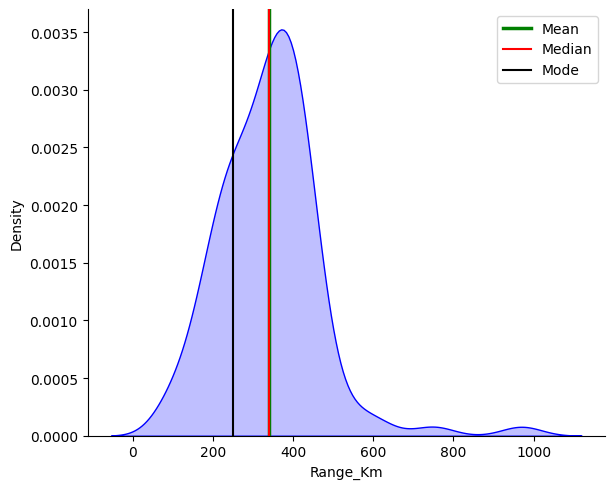

In [144]:
plt.figure()
sns.displot(
    data=electric_car_df,
    x='Range_Km',
    kind='kde',
    fill=True,
    color='blue',
    aspect=1.25
)
plt.axvline(x = electric_car_df.Range_Km.mean(), color='green', linewidth=2.5, label='Mean')
plt.axvline(x = electric_car_df.Range_Km.median(), color='red', linestyle='-', label='Median')
plt.axvline(x = 250, color='black', linestyle='-', label='Mode')
plt.legend()
plt.show()

In [ ]:
# sns.boxplot(
#     data=electric_car_df
# )